# Kevin Alvarez CSC 217 Fall 2019 Final Project

In this project I hope to explore the relationships between the usage of different drugs. Does the amount of times a person consumes one drug compare to how much they consume another? How does the percentage of using a drug compare to how often it is used? What can we expect with the more socially acceptable drugs compared to others?
To help answer these questions we use the data that was gathered by  National Survey on Drug Use and Health, 2012 (ICPSR 34933) Downloaded from https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv Loaded in from a csv file. Features 17 different age groups. Younger ages seemed to be surveyed more and therefore broken up. 
* Column (drug)-use includes percentage of n that used said drug in the past 12 months. 
* Column (drug)-frequency includes median number of how times a user in the age group used said drug in the past 12 months.

### Dataset

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data  

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3,1.1,4,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6,3.4,15,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5,8.7,24,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6,14.5,25,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10,22.5,30,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13,28.0,36,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24,33.7,52,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36,33.4,60,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48,34.0,60,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52,33.0,52,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


Creating two dataframes, one for just frequency and one for use to make it easier to use.

In [3]:
frequency_columns = []
use_columns = []

for col in data.columns:
    if('frequency' in col):
        frequency_columns.append(col);
for col in data.columns:
    if('use' in col):
        use_columns.append(col);
        
frequency_data = data.drop(use_columns,axis=1)
use_data = data.drop(frequency_columns,axis=1)

# Exploratory Analysis
First we will conduct an exploratory analysis to see what we're working with in the data.

## Visualizing Different Drug Frequencies

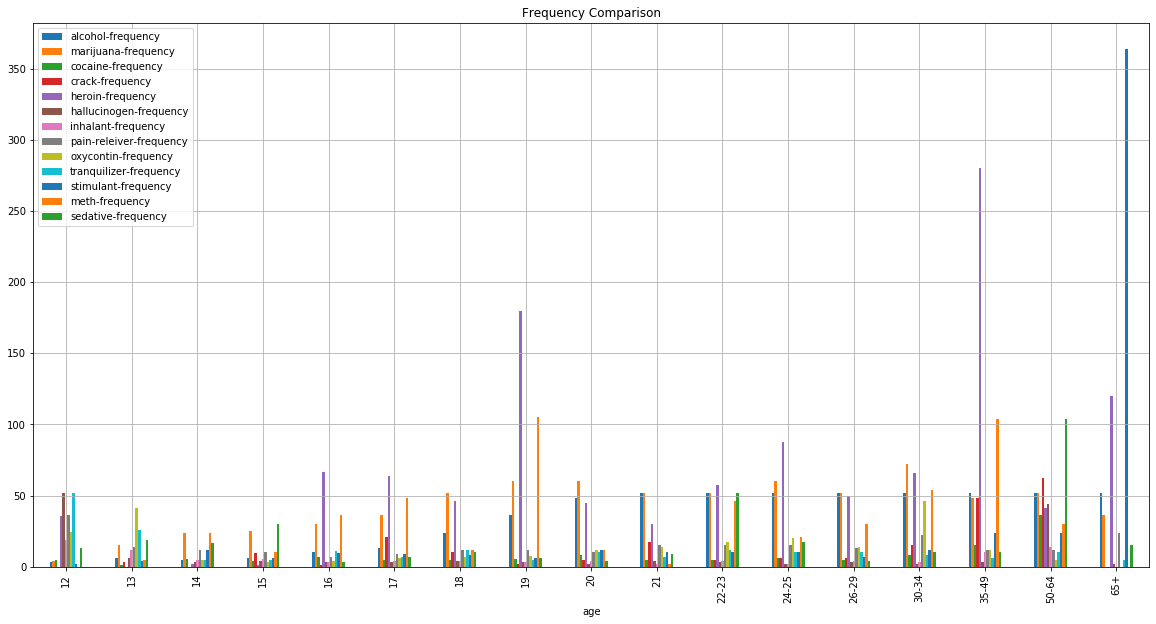

In [4]:
data.plot(x='age',y = frequency_columns ,grid = True, kind='bar',title='Frequency Comparison',figsize=(20,10))

Text(0.5, 0.92, 'Drug Frequency Boxplot')

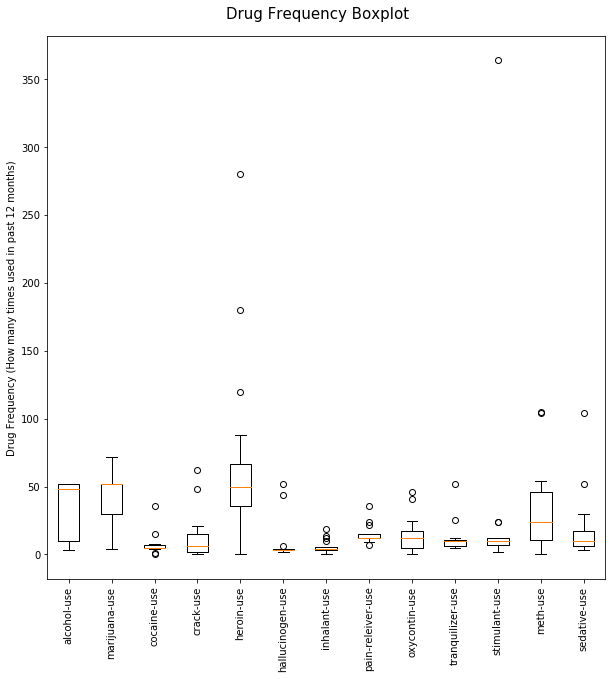

In [5]:
fig = plt.figure(figsize=(10,10))
boxplot_data = []
ticks = []
for index,col in enumerate(frequency_columns):
    boxplot_data.append(data[col])
    ticks.append(index + 1)
plt.boxplot(boxplot_data)
plt.xticks(ticks, use_columns,rotation=90)
plt.ylabel("Drug Frequency (How many times used in past 12 months)")
fig.suptitle("Drug Frequency Boxplot", fontsize=15, y=0.92)

From the visualizations we can see that the more addicting drugs such as heroin and/or meth along with the more socially acceptable drugs (alcohol/marijuana) are most commonly used within a 12 month period, with a noticeable outlier of ages 65+ using stimulants around 360 times in a year. This might show that those using stimulants are prescribed it and therefore use it everyday. One thing to keep in mind is that this data is only for those who said they have used said drug in those 12 months.

## Visualizing Different Drug Use

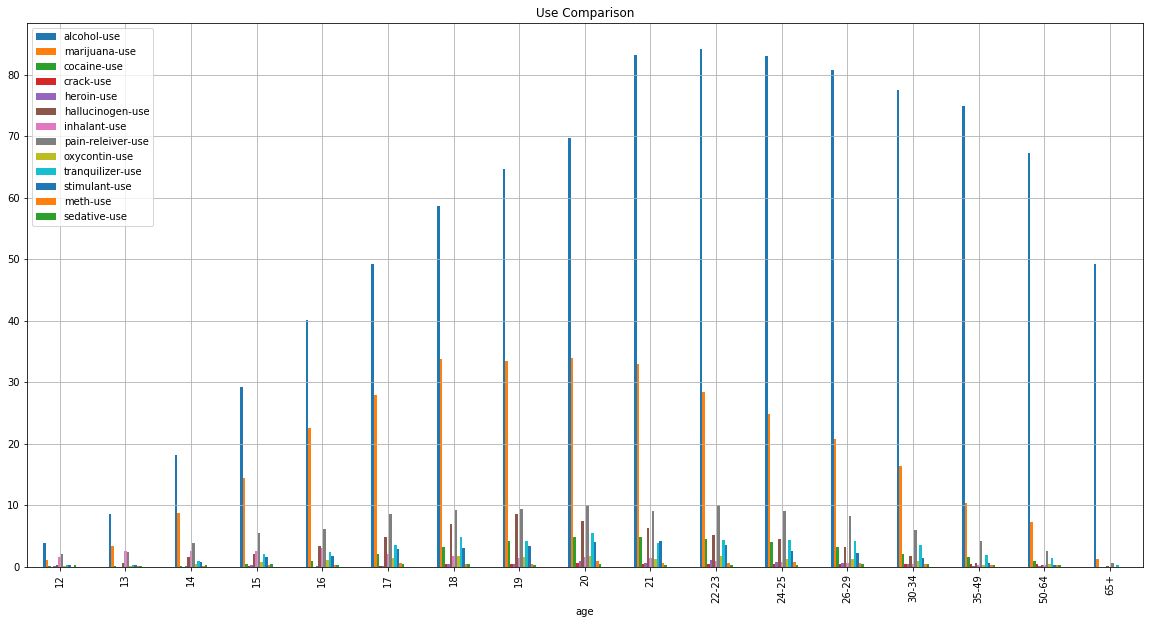

In [6]:
data.plot(x='age',y = use_columns ,grid = True, kind='bar',title='Use Comparison',figsize=(20,10))

Text(0.5, 0.92, 'Drug Use Boxplot')

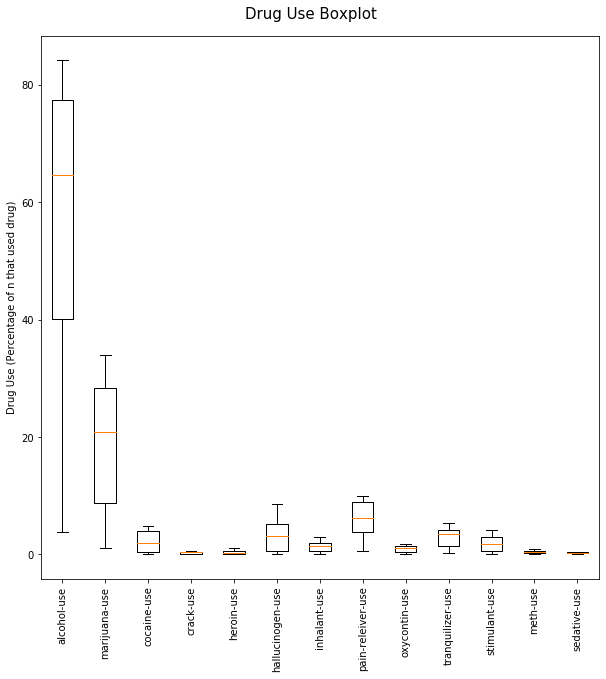

In [7]:
fig = plt.figure(figsize=(10,10))
boxplot_data = []
ticks = []
for index,col in enumerate(use_columns):
    boxplot_data.append(data[col])
    ticks.append(index + 1)
plt.boxplot(boxplot_data)
plt.xticks(ticks, use_columns,rotation=90)
plt.ylabel("Drug Use (Percentage of n that used drug)")
fig.suptitle("Drug Use Boxplot", fontsize=15, y=0.92)

These graph shows that a higher percentage of people consume alcohol in each age group by a large margin. This is possibly due to its legality. We also see that there is an increase of alcohol use in each age group until the age of 22 and then slowly goes down a bit. It hits its peak around the age alcohol becomes legal to drink in the United States. THis also ties in with the more socially acceptable drugs being used by more people than those frowned upon

## Exploring both Frequency and Use values

In [8]:
# Mean Frequency of each drug
data[frequency_columns].mean()

alcohol-frequency          33.352941
marijuana-frequency        42.941176
cocaine-frequency           7.411765
crack-frequency            12.382353
heroin-frequency           68.970588
hallucinogen-frequency      8.411765
inhalant-frequency          5.794118
pain-releiver-frequency    14.705882
oxycontin-frequency        13.941176
tranquilizer-frequency     11.735294
stimulant-frequency        31.147059
meth-frequency             31.735294
sedative-frequency         19.382353
dtype: float64

In [9]:
# Mean Drug use of each drug
data[use_columns].mean()

alcohol-use          55.429412
marijuana-use        18.923529
cocaine-use           2.176471
crack-use             0.294118
heroin-use            0.352941
hallucinogen-use      3.394118
inhalant-use          1.388235
pain-releiver-use     6.270588
oxycontin-use         0.935294
tranquilizer-use      2.805882
stimulant-use         1.917647
meth-use              0.382353
sedative-use          0.282353
dtype: float64

In [10]:
# Maximum of Frequency
data[frequency_columns].max()

alcohol-frequency           52.0
marijuana-frequency         72.0
cocaine-frequency           36.0
crack-frequency             62.0
heroin-frequency           280.0
hallucinogen-frequency      52.0
inhalant-frequency          19.0
pain-releiver-frequency     36.0
oxycontin-frequency         46.0
tranquilizer-frequency      52.0
stimulant-frequency        364.0
meth-frequency             105.0
sedative-frequency         104.0
dtype: float64

In [11]:
# Mininum of Frequency
data[frequency_columns].min()

alcohol-frequency          3.0
marijuana-frequency        4.0
cocaine-frequency          0.0
crack-frequency            0.0
heroin-frequency           0.0
hallucinogen-frequency     2.0
inhalant-frequency         0.0
pain-releiver-frequency    7.0
oxycontin-frequency        0.0
tranquilizer-frequency     4.5
stimulant-frequency        2.0
meth-frequency             0.0
sedative-frequency         3.0
dtype: float64

In [12]:
# Maximum of Use
data[use_columns].max()

alcohol-use          84.2
marijuana-use        34.0
cocaine-use           4.9
crack-use             0.6
heroin-use            1.1
hallucinogen-use      8.6
inhalant-use          3.0
pain-releiver-use    10.0
oxycontin-use         1.7
tranquilizer-use      5.4
stimulant-use         4.1
meth-use              0.9
sedative-use          0.5
dtype: float64

In [13]:
# Minimum of Use
data[use_columns].min()

alcohol-use          3.9
marijuana-use        1.1
cocaine-use          0.0
crack-use            0.0
heroin-use           0.0
hallucinogen-use     0.1
inhalant-use         0.0
pain-releiver-use    0.6
oxycontin-use        0.0
tranquilizer-use     0.2
stimulant-use        0.0
meth-use             0.0
sedative-use         0.0
dtype: float64

In [14]:
# Variance of frequency
data[frequency_columns].var()

alcohol-frequency           454.492647
marijuana-frequency         337.183824
cocaine-frequency            64.226103
crack-frequency             301.422794
heroin-frequency           4921.483456
hallucinogen-frequency      225.007353
inhalant-frequency           24.376838
pain-releiver-frequency      48.095588
oxycontin-frequency         166.465074
tranquilizer-frequency      131.909926
stimulant-frequency        7391.492647
meth-frequency             1037.253676
sedative-frequency          616.704044
dtype: float64

In [15]:
# Variance of use
data[use_columns].var()

alcohol-use          722.473456
marijuana-use        143.035662
cocaine-use            3.300662
crack-use              0.055588
heroin-use             0.111397
hallucinogen-use       7.798088
inhalant-use           0.859853
pain-releiver-use     10.025956
oxycontin-use          0.369926
tranquilizer-use       3.074338
stimulant-use          1.981544
meth-use               0.069044
sedative-use           0.019044
dtype: float64

In [16]:
# Range of frequency
data[frequency_columns].max() - data[frequency_columns].min()

alcohol-frequency           49.0
marijuana-frequency         68.0
cocaine-frequency           36.0
crack-frequency             62.0
heroin-frequency           280.0
hallucinogen-frequency      50.0
inhalant-frequency          19.0
pain-releiver-frequency     29.0
oxycontin-frequency         46.0
tranquilizer-frequency      47.5
stimulant-frequency        362.0
meth-frequency             105.0
sedative-frequency         101.0
dtype: float64

In [17]:
# Range of use
data[use_columns].max() - data[use_columns].min()

alcohol-use          80.3
marijuana-use        32.9
cocaine-use           4.9
crack-use             0.6
heroin-use            1.1
hallucinogen-use      8.5
inhalant-use          3.0
pain-releiver-use     9.4
oxycontin-use         1.7
tranquilizer-use      5.2
stimulant-use         4.1
meth-use              0.9
sedative-use          0.5
dtype: float64

In [18]:
# Frequency Interquatile Range
data[frequency_columns].quantile(q=0.75) - data[frequency_columns].quantile(q=0.25)

alcohol-frequency          42.0
marijuana-frequency        22.0
cocaine-frequency           2.0
crack-frequency            13.0
heroin-frequency           31.0
hallucinogen-frequency      1.0
inhalant-frequency          2.5
pain-releiver-frequency     3.0
oxycontin-frequency        12.5
tranquilizer-frequency      5.0
stimulant-frequency         5.0
meth-frequency             35.5
sedative-frequency         11.0
dtype: float64

In [19]:
# Use Interquatile Range
data[use_columns].quantile(q=0.75) - data[use_columns].quantile(q=0.25)

alcohol-use          37.4
marijuana-use        19.7
cocaine-use           3.5
crack-use             0.5
heroin-use            0.5
hallucinogen-use      4.6
inhalant-use          1.4
pain-releiver-use     5.1
oxycontin-use         1.0
tranquilizer-use      2.8
stimulant-use         2.4
meth-use              0.4
sedative-use          0.2
dtype: float64

The data above reiterates many of the findings determined from the visualizations from above it.

## Scatter Plot of Use to Frequency

Text(0.5, 0.92, 'Use vs Frequency Scatter Plot')

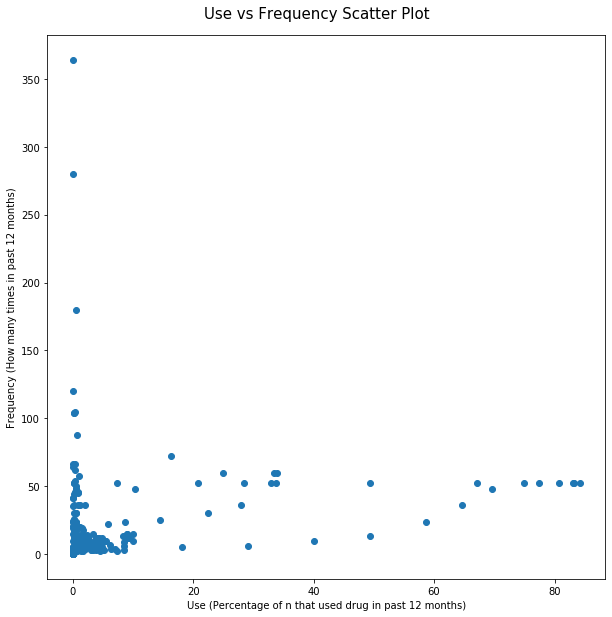

In [20]:
fig = plt.figure(figsize=(10,10))
plt.scatter(data[use_columns],
            data[frequency_columns])
plt.xlabel("Use (Percentage of n that used drug in past 12 months)")
plt.ylabel("Frequency (How many times in past 12 months)")
fig.suptitle("Use vs Frequency Scatter Plot", fontsize=15, y=0.92)

From this we see that the percentage of those using doesn't necessarily mean that they are more inclined to use more frequently. If anything this shows that the more frequently used drugs are those that aren't used by as many people. We see most of the data lays on the lower side. Later we will go more in depth into specific drug frequencies vs use.

# Chi Square Tests

## Chi Square Tests for Two Different Drug Frequencies

First we create the lists for each drug frequencies and then set up the rejection region with a degrees of freedom of 16. Since there are 17 outcomes and two distributions. (17 - 1) * (2 - 1)
* Null Hypothesis: is that the these two frequencies can come from the same distribution
* Alternate Hypothesis is that they come from another distribution

For this test I will test drugs in similar classifications (opiates, psychedelic, etc.) and those that are paired more often.
I will not be testing all drug combinations since that will be too many to test. However, the data will be organized so that they can easily be tested in the future if wanted.

In [21]:
alcohol_frequencies = []
marijuana_frequencies = []
cocaine_frequencies = []
crack_frequencies = []
heroin_frequencies = []
hallucinogen_frequencies = []
inhalant_frequencies = []
pain_releiver_frequencies = []
oxycontin_frequencies = []
tranquilizer_frequencies = []
stimulant_frequencies = []
meth_frequencies = []
sedative_frequencies = []

for index, row in data.iterrows():
    alcohol_frequencies.append(data.at[index,'alcohol-frequency'])
    marijuana_frequencies.append(data.at[index,'marijuana-frequency'])
    cocaine_frequencies.append(data.at[index,'cocaine-frequency'])
    crack_frequencies.append(data.at[index,'crack-frequency'])
    heroin_frequencies.append(data.at[index,'heroin-frequency'])
    hallucinogen_frequencies.append(data.at[index,'hallucinogen-frequency'])
    inhalant_frequencies.append(data.at[index,'inhalant-frequency'])
    pain_releiver_frequencies.append(data.at[index,'pain-releiver-frequency'])
    oxycontin_frequencies.append(data.at[index,'oxycontin-frequency'])
    tranquilizer_frequencies.append(data.at[index,'tranquilizer-frequency'])
    stimulant_frequencies.append(data.at[index,'stimulant-frequency'])
    meth_frequencies.append(data.at[index,'meth-frequency'])
    sedative_frequencies.append(data.at[index,'sedative-frequency'])

Rejection Region: Greater than 26.3


Text(0.5, 0.92, 'Chi-Square Distribution with 16 Degrees of Freedom')

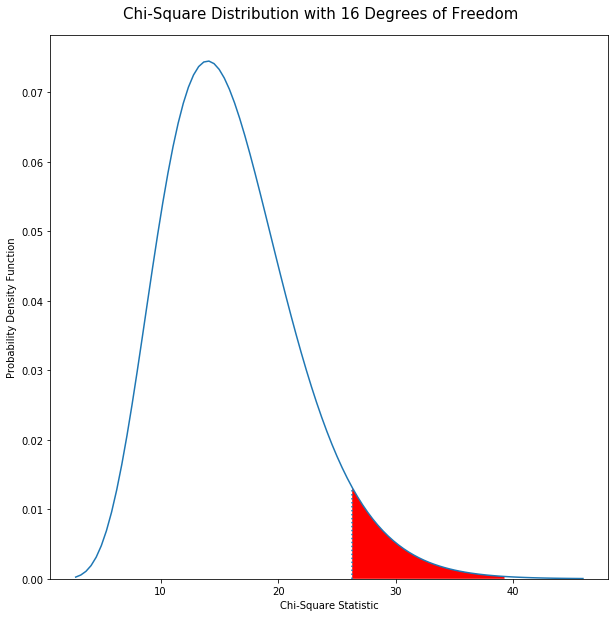

In [22]:
degrees_freedom = len(alcohol_frequencies) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [23]:
stats.chi2_contingency([alcohol_frequencies, marijuana_frequencies])

(53.76907381287019,
 5.6557322379107144e-06,
 16,
 array([[ 3.06013878,  9.18041635, 12.67771781, 13.55204318, 17.48650732,
         21.42097147, 33.22436392, 41.96761758, 47.21356978, 45.46491904,
         45.46491904, 48.96222051, 45.46491904, 54.20817271, 43.71626831,
         45.46491904, 38.47031611],
        [ 3.93986122, 11.81958365, 16.32228219, 17.44795682, 22.51349268,
         27.57902853, 42.77563608, 54.03238242, 60.78643022, 58.53508096,
         58.53508096, 63.03777949, 58.53508096, 69.79182729, 56.28373169,
         58.53508096, 49.52968389]]))

In [24]:
stats.chi2_contingency([marijuana_frequencies, hallucinogen_frequencies])

(362.39473600833384,
 2.6830384549216336e-67,
 16,
 array([[46.82703322, 17.56013746, 22.57731959, 24.24971363, 27.59450172,
         32.61168385, 46.82703322, 52.68041237, 51.84421535, 46.82703322,
         45.9908362 , 51.84421535, 45.9908362 , 61.87857961, 42.64604811,
         80.27491409, 31.77548683],
        [ 9.17296678,  3.43986254,  4.42268041,  4.75028637,  5.40549828,
          6.38831615,  9.17296678, 10.31958763, 10.15578465,  9.17296678,
          9.0091638 , 10.15578465,  9.0091638 , 12.12142039,  8.35395189,
         15.72508591,  6.22451317]]))

In [25]:
stats.chi2_contingency([heroin_frequencies, oxycontin_frequencies])

(398.8471928780818,
 6.351477556671292e-75,
 16,
 array([[ 49.91131607,  34.10606598,   5.40705924,   3.32742107,
          58.64579638,  58.22986875,  44.08832919, 155.97286272,
          47.41575027,  36.18570415,  62.38914509,  89.84036893,
          52.82280951,  93.16779   , 242.90173821,  38.26534232,
          99.82263214],
        [ 10.08868393,   6.89393402,   1.09294076,   0.67257893,
          11.85420362,  11.77013125,   8.91167081,  31.52713728,
           9.58424973,   7.31429585,  12.61085491,  18.15963107,
          10.67719049,  18.83221   ,  49.09826179,   7.73465768,
          20.17736786]]))

In [26]:
stats.chi2_contingency([stimulant_frequencies, meth_frequencies])

(626.5858960789922,
 5.2192329208337855e-123,
 16,
 array([[  0.99064546,   4.45790458,  17.83161833,   8.17282507,
          22.53718428,  28.2333957 ,   9.90645463,  54.9808232 ,
          11.88774556,   5.94387278,  27.73807297,  15.35500468,
          18.32694107,  32.69130028,  63.40130964,  26.7474275 ,
         180.29747428],
        [  1.00935454,   4.54209542,  18.16838167,   8.32717493,
          22.96281572,  28.7666043 ,  10.09354537,  56.0191768 ,
          12.11225444,   6.05612722,  28.26192703,  15.64499532,
          18.67305893,  33.30869972,  64.59869036,  27.2525725 ,
         183.70252572]]))

In [27]:
# :16 Since last element of both are 0 and causes error
stats.chi2_contingency([cocaine_frequencies[:16], crack_frequencies[:16]])

(46.75906003996498,
 4.023785032692029e-05,
 15,
 array([[ 1.87221397,  1.49777117,  2.05943536,  5.05497771,  2.99554235,
          9.73551263,  5.6166419 ,  2.80832095,  4.86775632,  8.23774146,
          3.74442793,  4.49331352,  4.11887073,  8.61218425, 23.58989599,
         36.69539376],
        [ 3.12778603,  2.50222883,  3.44056464,  8.44502229,  5.00445765,
         16.26448737,  9.3833581 ,  4.69167905,  8.13224368, 13.76225854,
          6.25557207,  7.50668648,  6.88112927, 14.38781575, 39.41010401,
         61.30460624]]))

The results gathered from these tests conclude that the amount of times one drug is consumed doesn't necessarily correlate to how much they will consume another drug. From all the tests conducted we see that the value we get is above the rejection region dictated above. Therefore we can reject the null hypothesis.

## Chi Square Tests for Two different Drug Use.

First we create the lists for each drug use count and then set up the rejection region with a degrees of freedom of 16. Since there are 17 outcomes and two distributions. (17 - 1) * (2 - 1). Same as previous chi square.
* Null Hypothesis: is that the these two frequencies can come from the same distribution
* Alternate Hypothesis is that they come from another distribution

Here I do the same above where I test drugs that are in similar classifications or those that I believe are most often paired together.

In [28]:
alcohol_use = []
marijuana_use = []
cocaine_use = []
crack_use = []
heroin_use = []
hallucinogen_use = []
inhalant_use = []
pain_releiver_use = []
oxycontin_use = []
tranquilizer_use = []
stimulant_use = []
meth_use = []
sedative_use = []

for index, row in data.iterrows():
    alcohol_use.append(data.at[index,'alcohol-use'])
    marijuana_use.append(data.at[index,'marijuana-use'])
    cocaine_use.append(data.at[index,'cocaine-use'])
    crack_use.append(data.at[index,'crack-use'])
    heroin_use.append(data.at[index,'heroin-use'])
    hallucinogen_use.append(data.at[index,'hallucinogen-use'])
    inhalant_use.append(data.at[index,'inhalant-use'])
    pain_releiver_use.append(data.at[index,'pain-releiver-use'])
    oxycontin_use.append(data.at[index,'oxycontin-use'])
    tranquilizer_use.append(data.at[index,'tranquilizer-use'])
    stimulant_use.append(data.at[index,'stimulant-use'])
    meth_use.append(data.at[index,'meth-use'])
    sedative_use.append(data.at[index,'sedative-use'])

Rejection Region: Greater than 26.3


Text(0.5, 0.92, 'Chi-Square Distribution with 16 Degrees of Freedom')

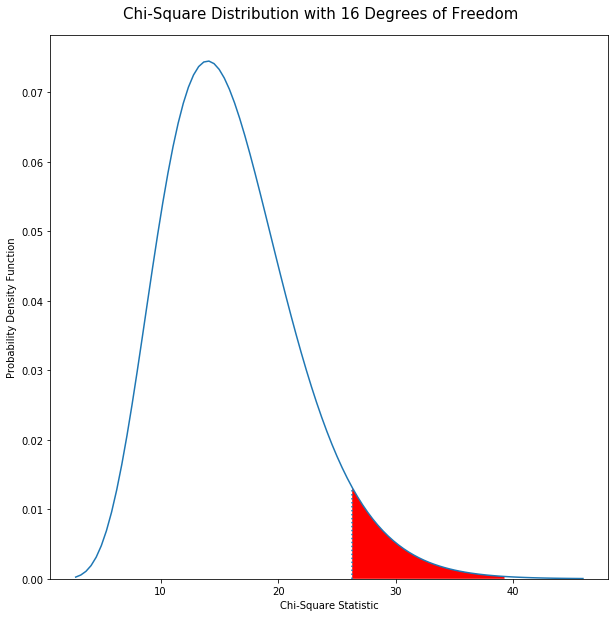

In [29]:
degrees_freedom = len(alcohol_frequencies) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [30]:
stats.chi2_contingency([alcohol_use, marijuana_use])

(60.279805638396574,
 4.6950716484037147e-07,
 16,
 array([[ 3.72745253,  8.87133703, 19.97914557, 32.57793513, 46.6677057 ,
         57.62641614, 68.88332278, 73.05806962, 77.30736551, 86.62599684,
         83.94223101, 80.51297468, 75.66728639, 70.00155854, 63.66488924,
         55.53904272, 37.64727057],
        [ 1.27254747,  3.02866297,  6.82085443, 11.12206487, 15.9322943 ,
         19.67358386, 23.51667722, 24.94193038, 26.39263449, 29.57400316,
         28.65776899, 27.48702532, 25.83271361, 23.89844146, 21.73511076,
         18.96095728, 12.85272943]]))

In [31]:
stats.chi2_contingency([marijuana_use, hallucinogen_use])

(3.54083405296351,
 0.9994953879807221,
 16,
 array([[ 1.10229309,  3.39167106,  8.73355298, 14.0754349 , 21.96107011,
         27.81170269, 34.51025303, 35.61254613, 35.10379547, 33.32316816,
         28.4900369 , 24.92878229, 20.35002636, 15.43210332,  9.32709541,
          6.44417501,  1.10229309],
        [ 0.19770691,  0.60832894,  1.56644702,  2.5245651 ,  3.93892989,
          4.98829731,  6.18974697,  6.38745387,  6.29620453,  5.97683184,
          5.1099631 ,  4.47121771,  3.64997364,  2.76789668,  1.67290459,
          1.15582499,  0.19770691]]))

In [32]:
stats.chi2_contingency([stimulant_frequencies, meth_frequencies])

(626.5858960789922,
 5.2192329208337855e-123,
 16,
 array([[  0.99064546,   4.45790458,  17.83161833,   8.17282507,
          22.53718428,  28.2333957 ,   9.90645463,  54.9808232 ,
          11.88774556,   5.94387278,  27.73807297,  15.35500468,
          18.32694107,  32.69130028,  63.40130964,  26.7474275 ,
         180.29747428],
        [  1.00935454,   4.54209542,  18.16838167,   8.32717493,
          22.96281572,  28.7666043 ,  10.09354537,  56.0191768 ,
          12.11225444,   6.05612722,  28.26192703,  15.64499532,
          18.67305893,  33.30869972,  64.59869036,  27.2525725 ,
         183.70252572]]))

In [33]:
stats.chi2_contingency([cocaine_use[:16], crack_use[:16]])

(1.2570919323897172,
 0.9999987397954455,
 15,
 array([[0.08809524, 0.08809524, 0.08809524, 0.52857143, 0.88095238,
         1.85      , 3.17142857, 4.05238095, 4.8452381 , 4.66904762,
         4.4047619 , 3.96428571, 3.17142857, 2.29047619, 1.76190476,
         1.1452381 ],
        [0.01190476, 0.01190476, 0.01190476, 0.07142857, 0.11904762,
         0.25      , 0.42857143, 0.54761905, 0.6547619 , 0.63095238,
         0.5952381 , 0.53571429, 0.42857143, 0.30952381, 0.23809524,
         0.1547619 ]]))

In [34]:
stats.chi2_contingency([heroin_use[:16],oxycontin_use[:16]])

(1.1491877180251064,
 0.9999993260400688,
 15,
 array([[0.05479452, 0.02739726, 0.1369863 , 0.2739726 , 0.32876712,
         0.4109589 , 0.57534247, 0.54794521, 0.71232877, 0.52054795,
         0.76712329, 0.54794521, 0.49315068, 0.35616438, 0.10958904,
         0.1369863 ],
        [0.14520548, 0.07260274, 0.3630137 , 0.7260274 , 0.87123288,
         1.0890411 , 1.52465753, 1.45205479, 1.88767123, 1.37945205,
         2.03287671, 1.45205479, 1.30684932, 0.94383562, 0.29041096,
         0.3630137 ]]))

In [35]:
stats.chi2_contingency([oxycontin_use, pain_releiver_use])

(0.7714787401226865,
 0.9999999913653335,
 16,
 array([[ 0.27257143,  0.3244898 ,  0.55812245,  0.81771429,  0.9475102 ,
          1.28497959,  1.41477551,  1.41477551,  1.51861224,  1.33689796,
          1.51861224,  1.33689796,  1.23306122,  0.88261224,  0.58408163,
          0.37640816,  0.07787755],
        [ 1.82742857,  2.1755102 ,  3.74187755,  5.48228571,  6.3524898 ,
          8.61502041,  9.48522449,  9.48522449, 10.18138776,  8.96310204,
         10.18138776,  8.96310204,  8.26693878,  5.91738776,  3.91591837,
          2.52359184,  0.52212245]]))

In these tests we see how the percentage of those using a drug are more likely to correlate with another drug in a similar classification. For instance marijuana and hallucinogens, or cocaine and crack which is freebase cocaine. We also see this with opiates when we test heroin and oxycontin and oxycontin and pain releivers. Oxycontin is believed to be a gateway into heroin and oxycontin falls in the classification of pain releiver.

## Chi Square Tests For Age Distributions
For this we will change the degrees of freedom since there are now 13 different outcomes (drugs in the data) however we are still checking only two distributions. In here we will check conduct two tests for an age group. One regarding the frequency and the other regarding use.
I predict that we'll see similar distributions in age groups that are closer to each other. Here we can use the same null and alternative hypothesis that we used above. We also do the same where we don't test each age group with one another since that will be too many to test. However it can also be easily tested if wanted in the future.

Rejection Region: Greater than 21.03


Text(0.5, 0.92, 'Chi-Square Distribution with 12 Degrees of Freedom')

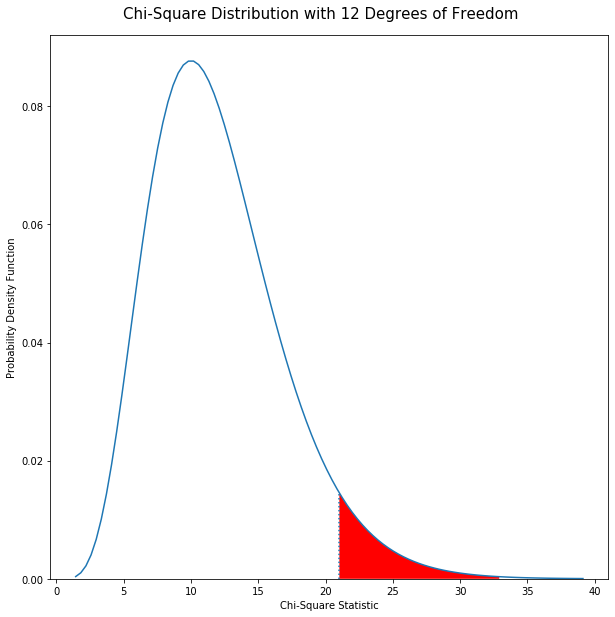

In [36]:
degrees_freedom = len(frequency_columns) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [37]:
# Ages 18 and 65+
stats.chi2_contingency([frequency_data.loc[6,frequency_columns].tolist(), frequency_data.loc[16,frequency_columns].tolist()])

(303.26669845447725,
 9.676714703523587e-58,
 12,
 array([[ 19.  ,  22.  ,   1.25,   2.5 ,  41.5 ,   1.5 ,   1.  ,   9.  ,
           1.75,   4.25,  93.  ,   3.  ,   6.25],
        [ 57.  ,  66.  ,   3.75,   7.5 , 124.5 ,   4.5 ,   3.  ,  27.  ,
           5.25,  12.75, 279.  ,   9.  ,  18.75]]))

In [38]:
stats.chi2_contingency([use_data.loc[6,use_columns].tolist(), use_data.loc[16,use_columns].tolist()])

(36.8253016140255,
 0.0002384513883559324,
 12,
 array([[76.51276234, 24.72495746,  2.26704481,  0.2833806 ,  0.2833806 ,
          5.03000567,  1.27521271,  6.94282473,  1.20436756,  3.61310267,
          2.12535451,  0.35422575,  0.2833806 ],
        [31.48723766, 10.17504254,  0.93295519,  0.1166194 ,  0.1166194 ,
          2.06999433,  0.52478729,  2.85717527,  0.49563244,  1.48689733,
          0.87464549,  0.14577425,  0.1166194 ]]))

In [39]:
# Ages 24-25 and 26-29
stats.chi2_contingency([frequency_data.loc[11,frequency_columns].tolist(), frequency_data.loc[12,frequency_columns].tolist()])

(17.75570142370833,
 0.12331211497556582,
 12,
 array([[57.58139535, 62.01073345,  6.09033989,  6.64400716, 76.40608229,
          2.76833631,  3.32200358, 15.50268336, 18.54785331, 11.07334526,
          9.41234347, 28.23703041, 11.90384615],
        [46.41860465, 49.98926655,  4.90966011,  5.35599284, 61.59391771,
          2.23166369,  2.67799642, 12.49731664, 14.95214669,  8.92665474,
          7.58765653, 22.76296959,  9.59615385]]))

In [40]:
stats.chi2_contingency([use_data.loc[11,use_columns].tolist(), use_data.loc[12,use_columns].tolist()])

(0.49797984044012644,
 0.9999997325270934,
 12,
 array([[85.04401368, 23.72717598,  3.7381984 ,  0.4672748 ,  0.67495249,
          3.99779552,  0.72687191,  8.98206005,  1.29798556,  4.41315089,
          2.54405169,  0.67495249,  0.31151653],
        [78.75598632, 21.97282402,  3.4618016 ,  0.4327252 ,  0.62504751,
          3.70220448,  0.67312809,  8.31793995,  1.20201444,  4.08684911,
          2.35594831,  0.62504751,  0.28848347]]))

In [41]:
# Ages 16 and 35-49
stats.chi2_contingency([frequency_data.loc[4,frequency_columns].tolist(), frequency_data.loc[14,frequency_columns].tolist()])

(49.77948641207546,
 1.5273835565625741e-06,
 12,
 array([[ 14.53006135,  18.2797546 ,   5.15582822,  11.48343558,
          81.20429448,   1.40613497,   3.04662577,   4.45276074,
           3.74969325,   3.98404908,   7.85092025,  32.80981595,
           3.04662577],
        [ 47.46993865,  59.7202454 ,  16.84417178,  37.51656442,
         265.29570552,   4.59386503,   9.95337423,  14.54723926,
          12.25030675,  13.01595092,  25.64907975, 107.19018405,
           9.95337423]]))

In [42]:
stats.chi2_contingency([use_data.loc[4,use_columns].tolist(), use_data.loc[14,use_columns].tolist()])

(20.394022831412048,
 0.05998994044458009,
 12,
 array([[53.08825843, 15.17466292,  1.15308989,  0.23061798,  0.09224719,
          1.84494382,  1.52207865,  4.79685393,  0.64573034,  1.98331461,
          1.10696629,  0.23061798,  0.23061798],
        [62.01174157, 17.72533708,  1.34691011,  0.26938202,  0.10775281,
          2.15505618,  1.77792135,  5.60314607,  0.75426966,  2.31668539,
          1.29303371,  0.26938202,  0.26938202]]))

From these tests we how the distribution of different drug usage by age can be derived from a similar distribution especially when the age groups are closer to one another. The farther away the age group the bigger difference we see. For instance when we tested ages 18 and 65+ or 

## Linear Relationships between Frequency and Use
We won't be doing this for all drugs since that will require too many charts. I included the residuals for alcohol and marijuana but not for the others to avoid cluttering this. We first import the function that will help with this and then convert our lists into a numpy array so we could work with it.

In [43]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [44]:
alcohol_frequencies = np.asarray(alcohol_frequencies,dtype=np.float64)
alcohol_use = np.asarray(alcohol_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(alcohol_use,
                                                                        alcohol_frequencies)

Text(0.5, 0.92, 'Alcohol Scatter')

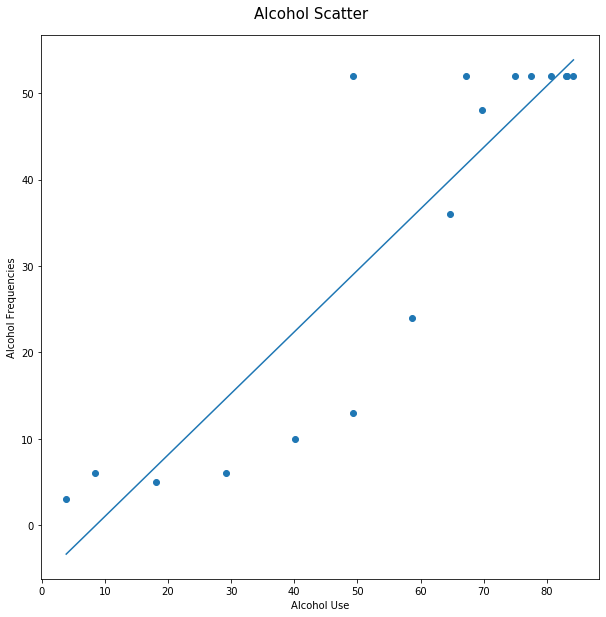

In [45]:
fig = plt.figure(figsize=(10,10))
plt.scatter(alcohol_use,
            alcohol_frequencies)
sorted_order = np.argsort(alcohol_use)
plt.plot(alcohol_use[sorted_order], predictions[sorted_order])
plt.ylabel("Alcohol Frequencies")
plt.xlabel("Alcohol Use")
fig.suptitle("Alcohol Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals')

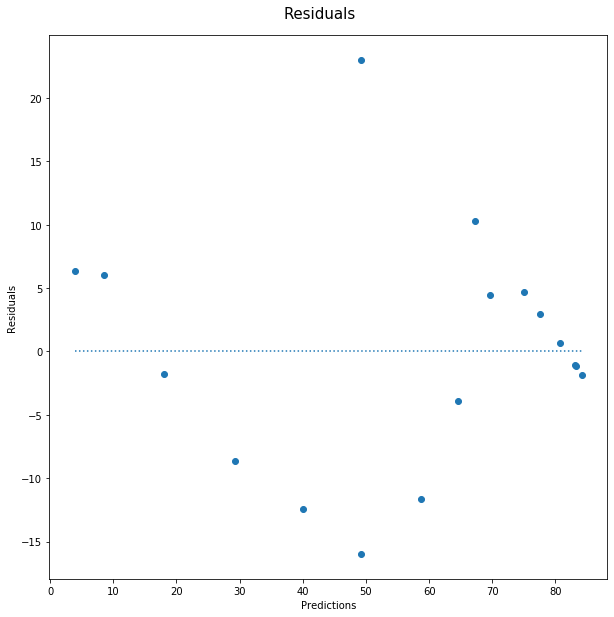

In [46]:
fig = plt.figure(figsize=(10,10))
plt.scatter(alcohol_use, residuals)
plt.plot([alcohol_use.min(), alcohol_use.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [47]:
#R-Squared Value
np.var(predictions) / np.var(alcohol_frequencies)

0.8062051839636541

Text(0.5, 0.92, 'Marijuana Scatter')

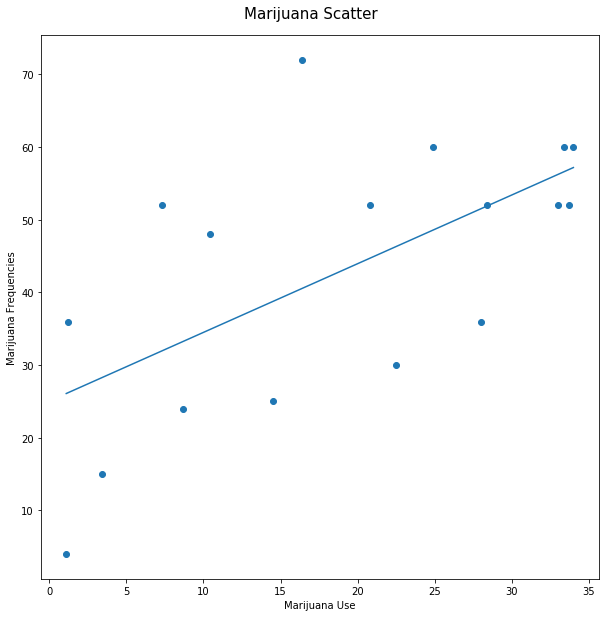

In [48]:
marijuana_frequencies = np.asarray(marijuana_frequencies,dtype=np.float64)
marijuana_use = np.asarray(marijuana_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(marijuana_use,
                                                                        marijuana_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(marijuana_use,
            marijuana_frequencies)
sorted_order = np.argsort(marijuana_use)
plt.plot(marijuana_use[sorted_order], predictions[sorted_order])
plt.ylabel("Marijuana Frequencies")
plt.xlabel("Marijuana Use")
fig.suptitle("Marijuana Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Residuals')

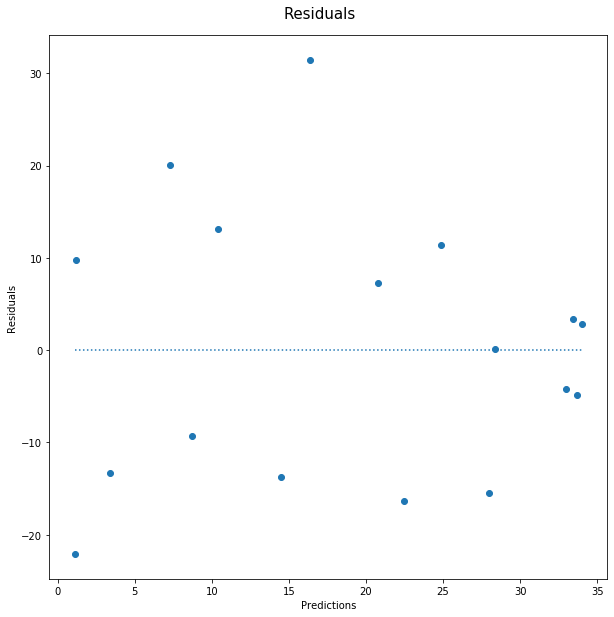

In [49]:
fig = plt.figure(figsize=(10,10))
plt.scatter(marijuana_use, residuals)
plt.plot([marijuana_use.min(), marijuana_use.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [50]:
#R-Squared Value
np.var(predictions) / np.var(marijuana_frequencies)

0.3789759207422415

Text(0.5, 0.92, 'Cocaine Scatter')

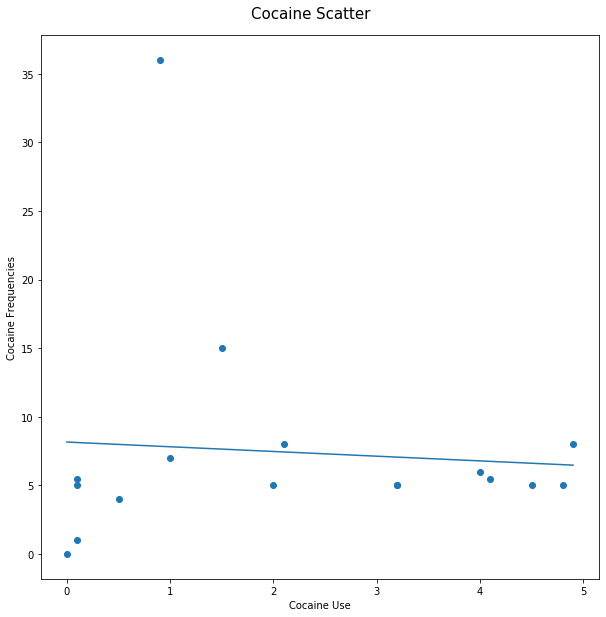

In [51]:
cocaine_frequencies = np.asarray(cocaine_frequencies,dtype=np.float64)
cocaine_use = np.asarray(cocaine_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(cocaine_use,
                                                                        cocaine_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(cocaine_use,
            cocaine_frequencies)
sorted_order = np.argsort(cocaine_use)
plt.plot(cocaine_use[sorted_order], predictions[sorted_order])
plt.ylabel("Cocaine Frequencies")
plt.xlabel("Cocaine Use")
fig.suptitle("Cocaine Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Crack Scatter')

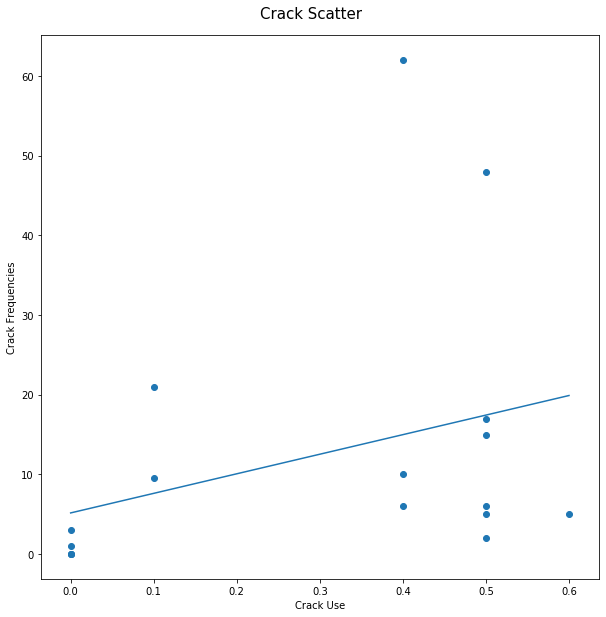

In [52]:
crack_frequencies = np.asarray(crack_frequencies,dtype=np.float64)
crack_use = np.asarray(crack_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(crack_use,
                                                                        crack_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(crack_use,
            crack_frequencies)
sorted_order = np.argsort(crack_use)
plt.plot(crack_use[sorted_order], predictions[sorted_order])
plt.ylabel("Crack Frequencies")
plt.xlabel("Crack Use")
fig.suptitle("Crack Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Tranquilizer Scatter')

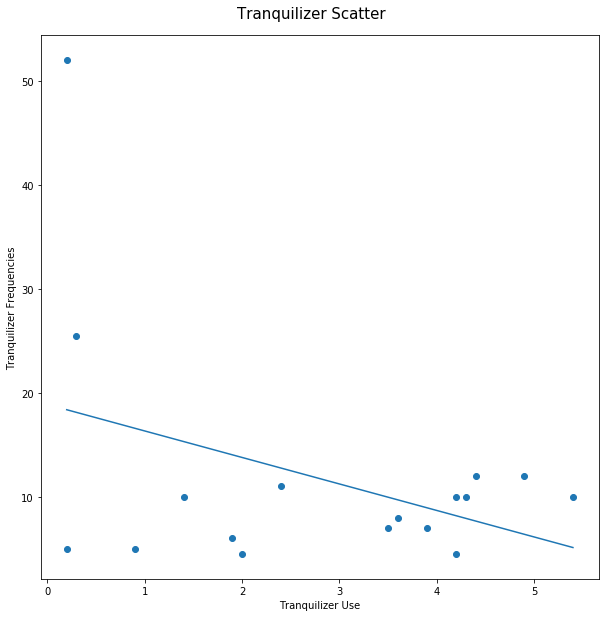

In [53]:
tranquilizer_frequencies = np.asarray(tranquilizer_frequencies,dtype=np.float64)
tranquilizer_use = np.asarray(tranquilizer_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(tranquilizer_use,
                                                                        tranquilizer_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(tranquilizer_use,
            tranquilizer_frequencies)
sorted_order = np.argsort(tranquilizer_use)
plt.plot(tranquilizer_use[sorted_order], predictions[sorted_order])
plt.ylabel("Tranquilizer Frequencies")
plt.xlabel("Tranquilizer Use")
fig.suptitle("Tranquilizer Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Sedative Scatter')

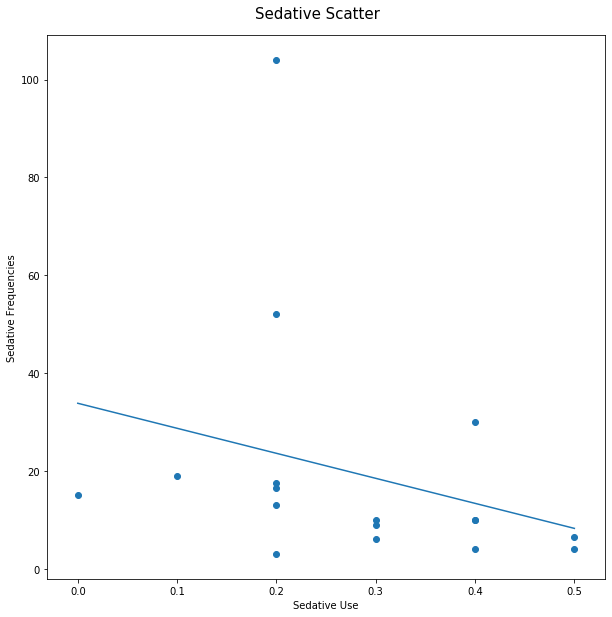

In [54]:
sedative_frequencies = np.asarray(sedative_frequencies,dtype=np.float64)
sedative_use = np.asarray(sedative_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(sedative_use,
                                                                        sedative_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(sedative_use,
            sedative_frequencies)
sorted_order = np.argsort(sedative_use)
plt.plot(sedative_use[sorted_order], predictions[sorted_order])
plt.ylabel("Sedative Frequencies")
plt.xlabel("Sedative Use")
fig.suptitle("Sedative Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Inhalant Scatter')

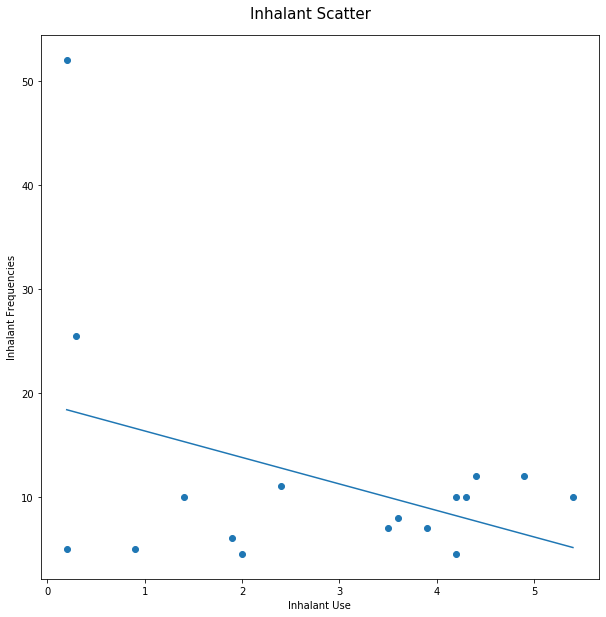

In [55]:
inhalant_frequencies = np.asarray(tranquilizer_frequencies,dtype=np.float64)
inhalant_use = np.asarray(tranquilizer_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(inhalant_use,
                                                                        inhalant_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(inhalant_use,
            inhalant_frequencies)
sorted_order = np.argsort(inhalant_use)
plt.plot(inhalant_use[sorted_order], predictions[sorted_order])
plt.ylabel("Inhalant Frequencies")
plt.xlabel("Inhalant Use")
fig.suptitle("Inhalant Scatter", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Hallucinogen Scatter')

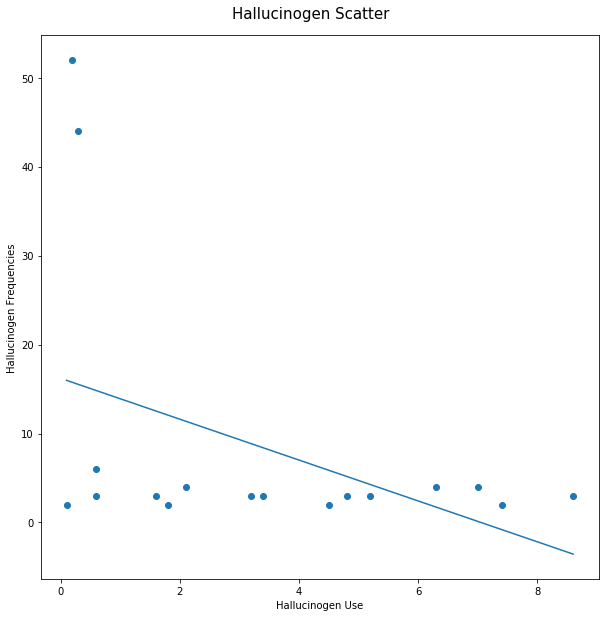

In [56]:
hallucinogen_frequencies = np.asarray(hallucinogen_frequencies,dtype=np.float64)
hallucinogen_use = np.asarray(hallucinogen_use,dtype=np.float64)
slope, intercept, predictions, residuals = evaluate_linear_relationship(hallucinogen_use,
                                                                        hallucinogen_frequencies)
fig = plt.figure(figsize=(10,10))
plt.scatter(hallucinogen_use,
            hallucinogen_frequencies)
sorted_order = np.argsort(hallucinogen_use)
plt.plot(hallucinogen_use[sorted_order], predictions[sorted_order])
plt.ylabel("Hallucinogen Frequencies")
plt.xlabel("Hallucinogen Use")
fig.suptitle("Hallucinogen Scatter", fontsize=15, y=0.92)

# Conclusion
From this python notebook we were able to see how the more socially acceptable a drug is the more likely it is to be used among a higher percentage of a group. With the exploratory analysis we were able to visualize the data and get some facts from it.
From the chi square tests we can see how there is more of a connection between the percentage of each age group that uses a drug compared to how often they might be using said drug. Additionally when evaluating the linear relationships between the frequency and use of each drug, we're unable to determine a concrete connection. In some drugs we see positive relationship while in others we see a negative one. However, we do notice a positive correlation in those that seemed to be most used among the population, alcohol and marijuana for instance.